In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# En una notebook dentro de prediccion_ie/notebooks:
PROJECT_DIR = os.path.dirname(os.getcwd())   # sube un nivel: prediccion_ie/
DATA_DIR = os.path.join(PROJECT_DIR, "files")
TRAIN_PATH = os.path.join(DATA_DIR, "personality_dataset.csv")

print("PROJECT_DIR:", PROJECT_DIR)
print("DATA_DIR:", DATA_DIR)
print("TRAIN_PATH:", TRAIN_PATH)

df = pd.read_csv(TRAIN_PATH)
df.head()


PROJECT_DIR: b:\unison\reconocimiento_patrones\prediccion_ie
DATA_DIR: b:\unison\reconocimiento_patrones\prediccion_ie\files
TRAIN_PATH: b:\unison\reconocimiento_patrones\prediccion_ie\files\personality_dataset.csv


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


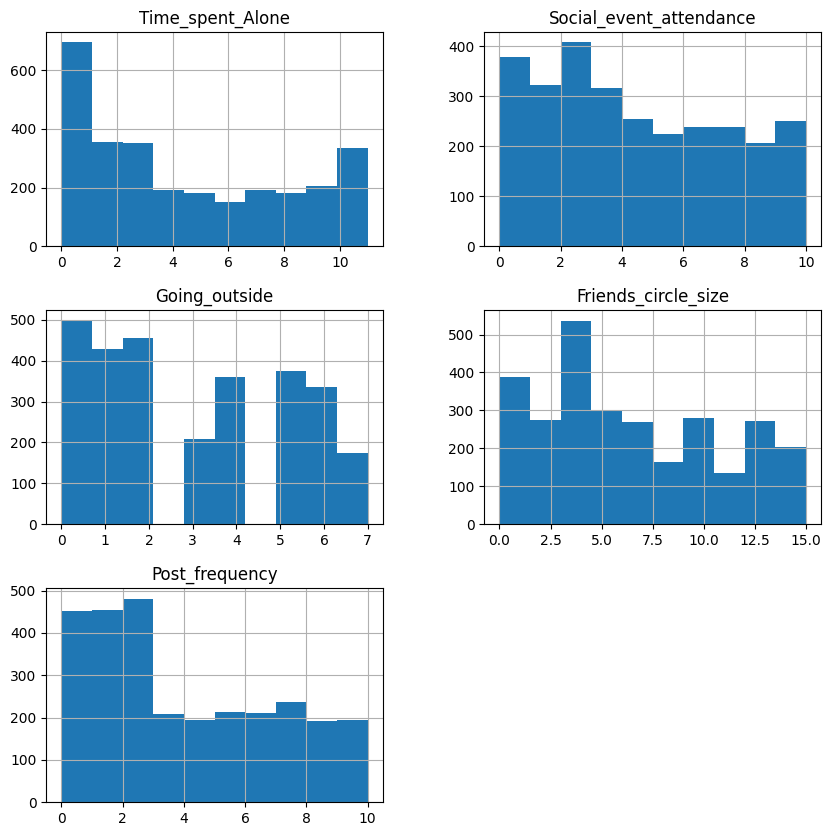

In [8]:
#que distribucion tiene el dataset
df.hist(figsize=(10, 10))
plt.show()

In [9]:
#datos faltantes del dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

#Eliminar los datos duplicados
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Missing values in each column:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

Total missing values in the dataset: 458
Number of rows after removing duplicates: 2512


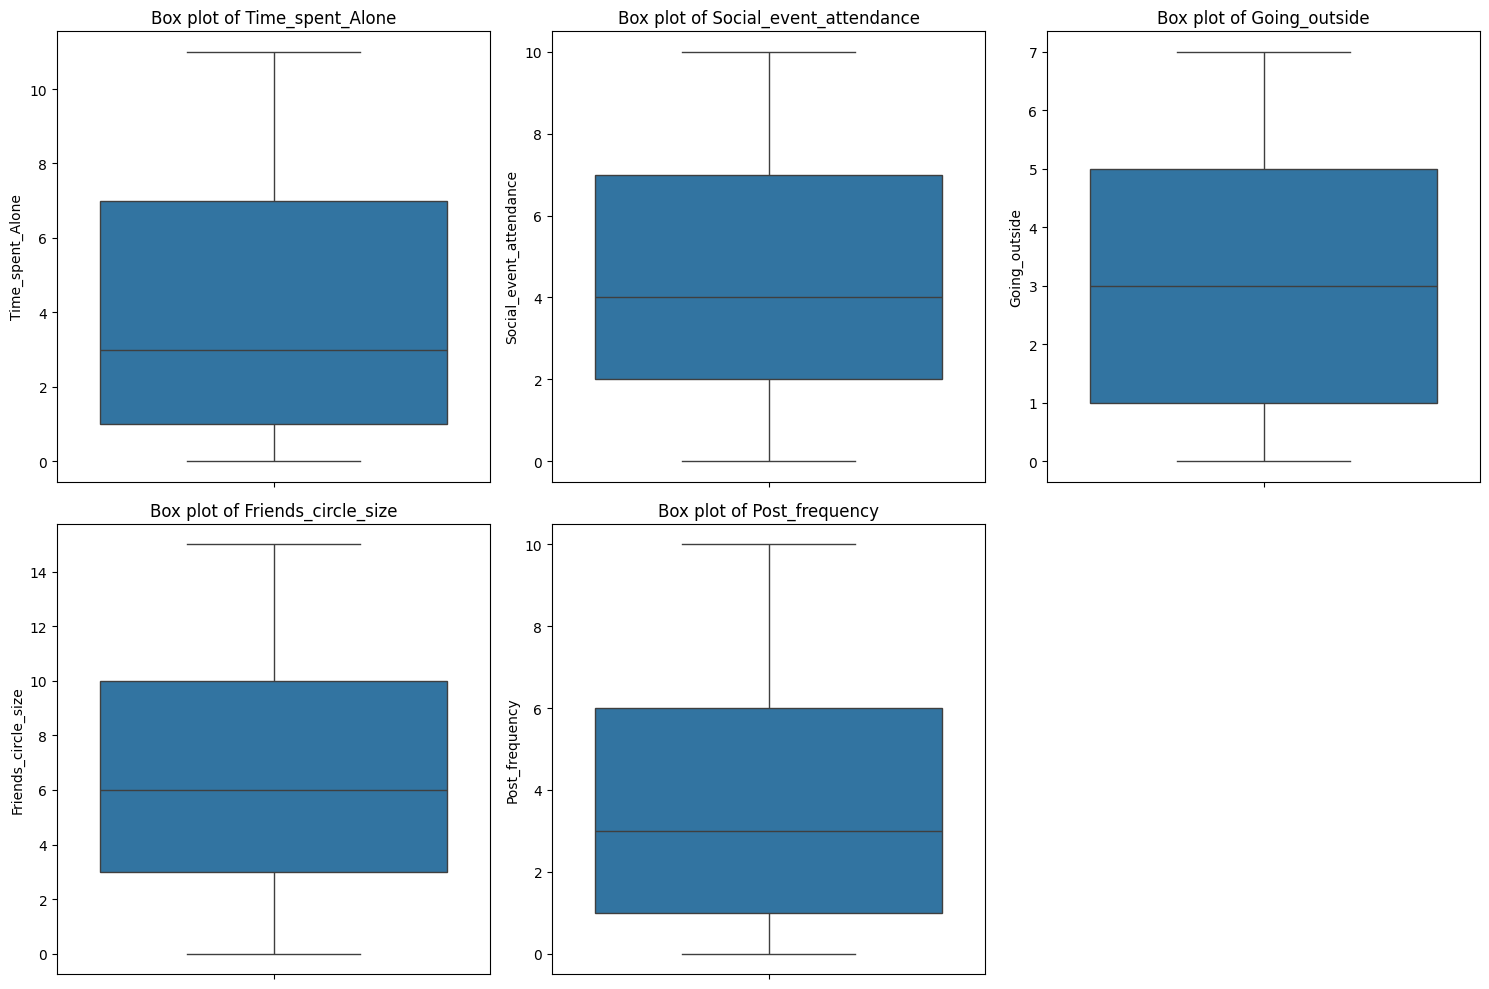

In [10]:
#revisar si hay outliers
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [11]:
#Normalizamos nombres y valores categoricos

# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Normalized Column Names:", df.columns.tolist())

# Normalize categorical values (lowercase and strip whitespace)
categorical_cols_to_normalize = ['stage_fear', 'drained_after_socializing', 'personality']
for col in categorical_cols_to_normalize:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()
        print(f"\nUnique values in normalized '{col}':", df[col].unique().tolist())
    else:
        print(f"Column '{col}' not found after renaming. Skipping normalization for this column.")

display(df.head())

Normalized Column Names: ['time_spent_alone', 'stage_fear', 'social_event_attendance', 'going_outside', 'drained_after_socializing', 'friends_circle_size', 'post_frequency', 'personality']

Unique values in normalized 'stage_fear': ['no', 'yes', 'nan']

Unique values in normalized 'drained_after_socializing': ['no', 'yes', 'nan']

Unique values in normalized 'personality': ['extrovert', 'introvert']


,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,no,4.0,6.0,no,13.0,5.0,extrovert
1,9.0,yes,0.0,0.0,yes,0.0,3.0,introvert
2,9.0,yes,1.0,2.0,yes,5.0,2.0,introvert
3,0.0,no,6.0,7.0,no,14.0,8.0,extrovert
4,3.0,no,9.0,4.0,no,8.0,5.0,extrovert


In [12]:
#Separar las caractersticas y target
X = df.drop('personality', axis=1)
y = df['personality']

In [13]:
#codificar la varible 'y' fuera del pipeline de X
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
#columnas para el pipeline
#numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [15]:
#Pipeline para las caracteristicas numericas para la imputacion , escalado
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [16]:
#Aplicar transformaciones diferentes a tipos de las columnas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [17]:
print(f"The target variable 'personality' has unique values: {df['personality'].unique().tolist()}")
print("Since the target variable is categorical, this is a Classification problem.")

The target variable 'personality' has unique values: ['extrovert', 'introvert']
Since the target variable is categorical, this is a Classification problem.


In [18]:
#Integrar el preprocesamiento y reduccion de la dimencionalidad para el modelo
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#pca = PCA(n_components=0.95)
model = Pipeline(steps=[('preprocessor', preprocessor),
 ('pca', PCA(n_components=0.95)),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])
  #('classifier', LogisticRegression())])
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
}


In [19]:
#modelo de random forest
from sklearn.ensemble import RandomForestClassifier
model_fr = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])
param_grid_fr = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [20]:
#dision de los datos y entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [21]:
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
model_grid_lr = {
    'classifier__C': [0.1, 1.0, 10.0]
}

# Candidato 2: Random Forest (Más complejo, capaz de capturar no-linealidades)
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=42))
])
model_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, None]
}

In [22]:
# Búsqueda para Regresión Logística
from sklearn.model_selection import GridSearchCV
grid_search_lr = GridSearchCV(model_lr, model_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

# Búsqueda para Random Forest
grid_search_rf = GridSearchCV(model_rf, model_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# 3. Selección del Modelo más Adecuado (Modelo Retenido)
best_lr_score = grid_search_lr.best_score_
best_rf_score = grid_search_rf.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [23]:
if best_lr_score > best_rf_score:
    best_model = grid_search_lr.best_estimator_
    best_model_name = 'Logistic Regression'
else:
    best_model = grid_search_rf.best_estimator_
    best_model_name = 'Random Forest'

In [24]:
#evalual el modelo retenido con el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nModel: {best_model_name} (with PCA transformation)")
print(f"Accuracy: {accuracy:.4f}")


Model: Random Forest (with PCA transformation)
Accuracy: 0.9145


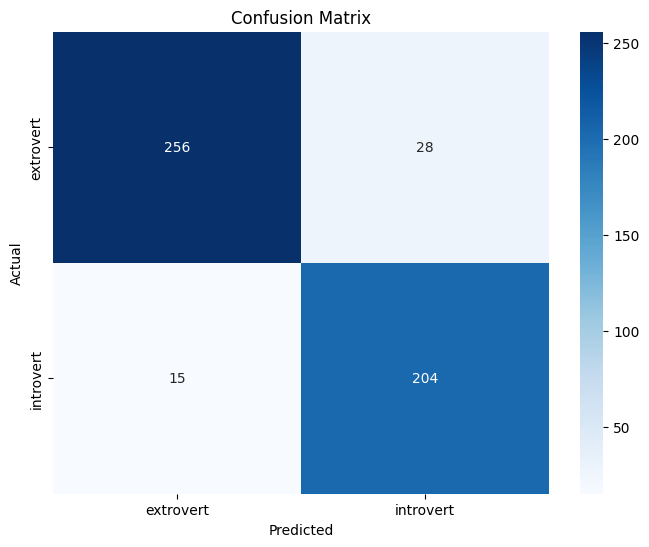

In [25]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.metrics import classification_report # Re-import the function to ensure it's callable

#metrica de entranamiento y de validacion
print("Precison, recall u F1_score por clases")
clf_report_result = classification_report(y_test, y_pred,
                                          target_names=label_encoder.classes_)
print(clf_report_result)

Precison, recall u F1_score por clases
              precision    recall  f1-score   support

   extrovert       0.94      0.90      0.92       284
   introvert       0.88      0.93      0.90       219

    accuracy                           0.91       503
   macro avg       0.91      0.92      0.91       503
weighted avg       0.92      0.91      0.91       503



In [27]:
#Curvas de aprendizaje
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    best_model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)


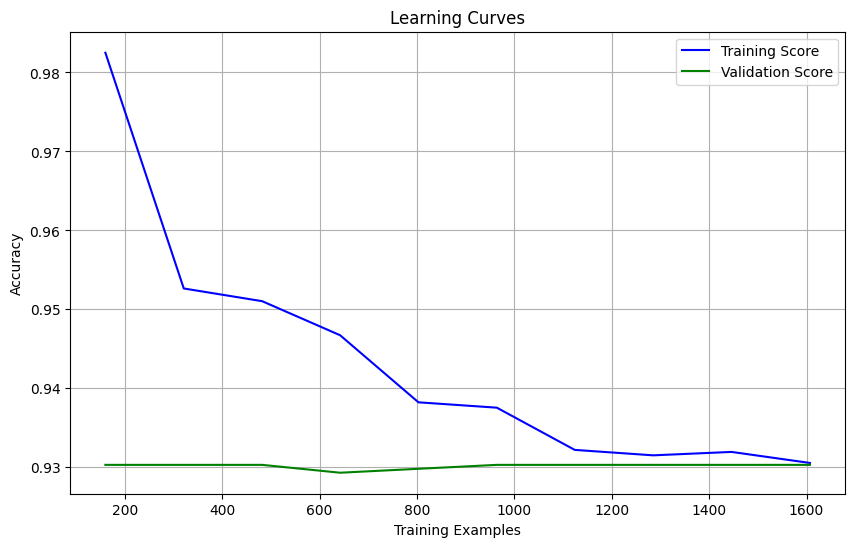

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score', color='green')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()